<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

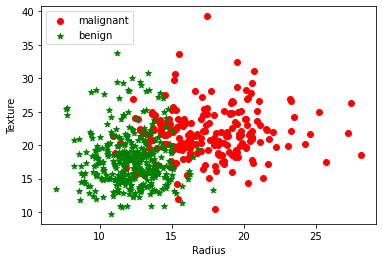

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score
 
# Load the breast cancer dataset

bc = datasets.load_breast_cancer()
# print(bc.target)
df = pd.DataFrame(data=bc.data)
df["label"] = bc.target
df.info() 

plt.scatter(df[0][df["label"] == 0], df[1][df["label"] == 0],
            color='red', marker='o', label='malignant')
plt.scatter(df[0][df["label"] == 1], df[1][df["label"] == 1],
            color='green', marker='*', label='benign')
plt.xlabel('Radius')
plt.ylabel('Texture')
plt.legend(loc='upper left')
plt.show()

In [2]:
X=df.iloc[:,0:2]
y=df['label']

In [3]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=10)

#train the model
svm.fit(X, y)


SVC(C=10, gamma=0.001, random_state=1)

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm, xx, yy, cmap=plt.cm.YlGn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, alpha=0.7 )
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Matplotib COLOR CHOICE
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
y_pred=svm.predict(X)

# Show the performance of your model
print(accuracy_score(y, y_pred))

<h2>Your task is:</h2>



1. Use your own dataset from assignment 1 (IMDB Favourite Series)

2. Perform Data Wrangling/Data Munging as necessary.

3. Make sure it suitable for classification (add another column for classification label. Every movie that has rating greater than 3.0 will be considered good, otherwise is bad)

4. Try the SVM classifier with different kernels, gamma and C setting.

5.   Conclude your findings, which setting is more suitable for your dataset. 





<h2> You can use your own dataset for your extramiles. For example, I want to use my data that I already cleaned from assignmen 1</h2>

In [ ]:
ddf=pd.read_csv("df.csv")

In [ ]:
ddf.info()
ddf

<h3> I add another column for classification label. Every movie that has rating greater than 3.0 will be considered good, otherwise is bad. 

In [ ]:
ddf['rating_class']=np.where(ddf['rating']>3.0,'good','bad')
ddf

In [ ]:
#I just want to use some part of the data. I slice the data only until 1000. 

X=ddf.iloc[0:1001,1:6]
y=ddf.loc[0:1000,'rating_class']

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.08, C=1)

#train the model
svm.fit(X, y)

#just use the same data to predict for now
y_pred=svm.predict(X)


print(accuracy_score(y, y_pred))